In [55]:
import numpy as np
from gen_result import plotPerformance
import seaborn as sns
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


working on 0.00


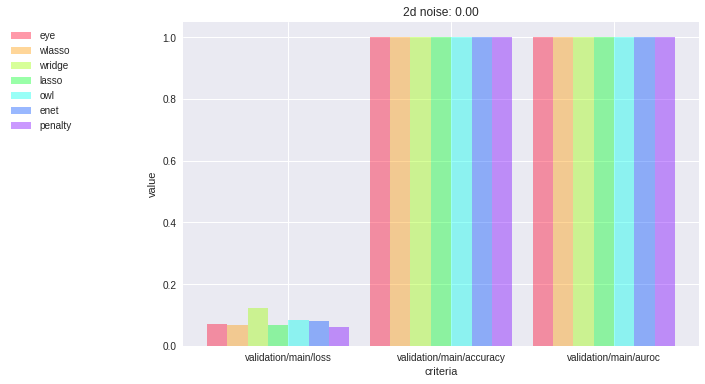

working on 0.22


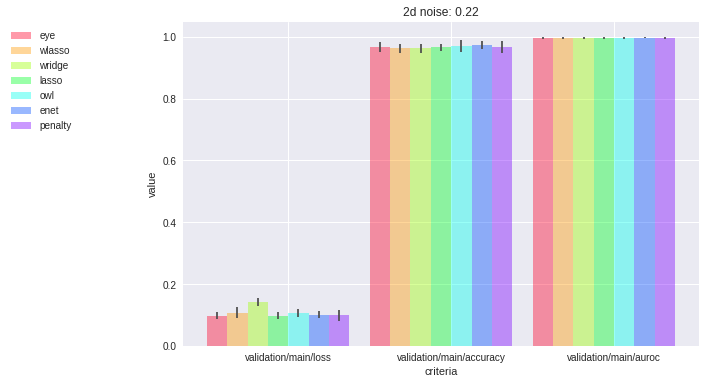

working on 0.44


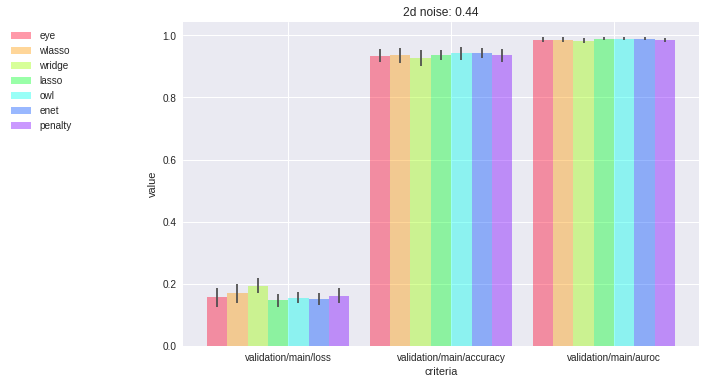

working on 0.67


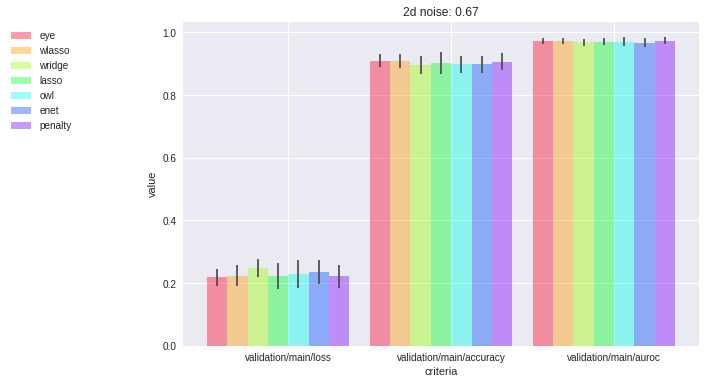

working on 0.89


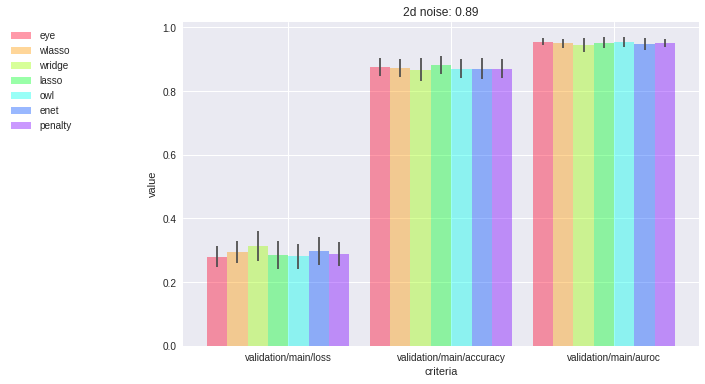

working on 1.11


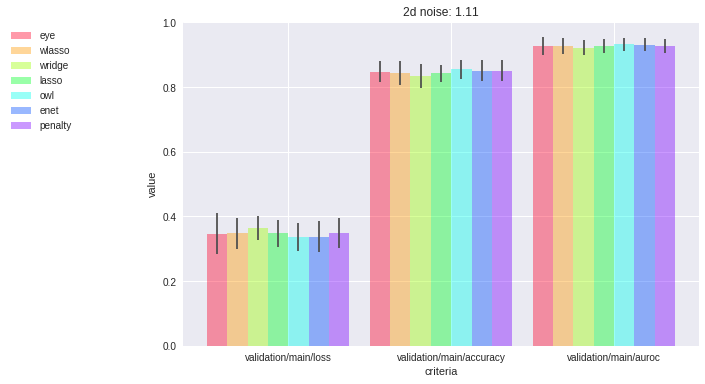

working on 1.33


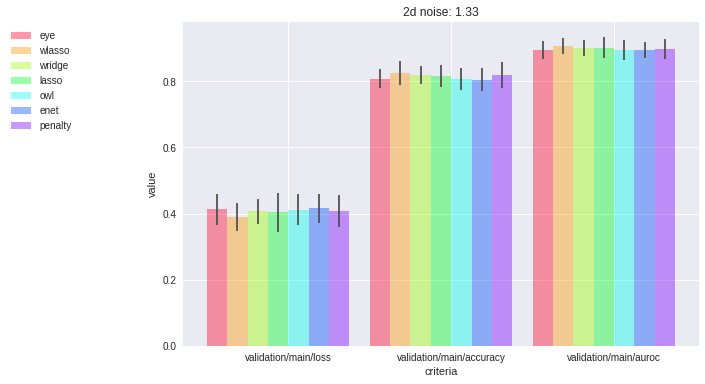

working on 1.56


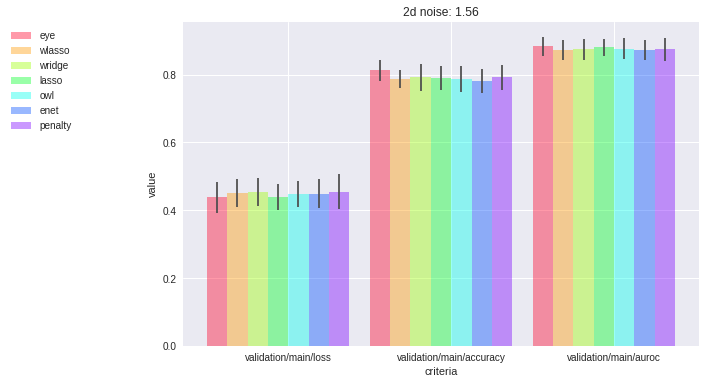

working on 1.78


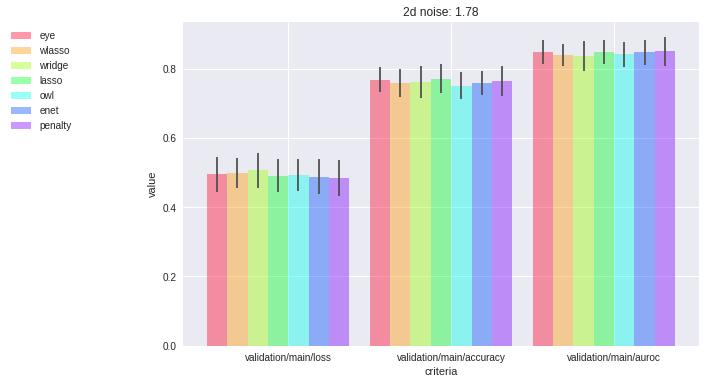

working on 2.00


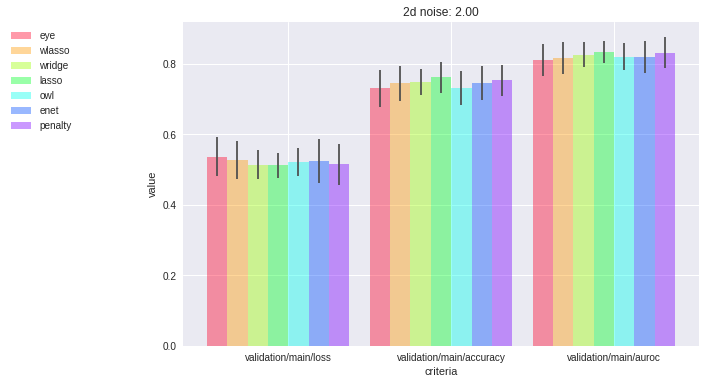

In [5]:
noise_levels = np.linspace(0,2,10)
for s in noise_levels:
    print("working on %.2f" % s)
    plotPerformance(basedir="noise2d/noise%.2f/0" % s, title="2d noise: %0.2f" % s)

In [57]:
from gen_result import regs
import os
import numpy as np
noise_levels = np.linspace(0,2,10)
basedir = "noise2d/"

def noise_mean_heatmap(regs=regs,feature=0): 
    heatmap = []
    for m in regs:         
        row =[]
        for s in noise_levels:
            data = np.load(os.path.join(basedir,
                                        "noise%.2f/0" % s,
                                        "result_%s" % m,
                                        "theta.npy"))
            data = data[np.isfinite(data).all(axis=1)]
            row.append(data[:,feature].mean())
        heatmap.append(row)
    return np.array(heatmap)

def noise_ratio_heatmap(regs=regs): 
    heatmap = []
    for m in regs:
        row =[]
        for s in noise_levels:
            data = np.load(os.path.join(basedir,
                                        "noise%.2f/0" % s,
                                        "result_%s" % m,
                                        "theta.npy"))
            data = data[np.isfinite(data).all(axis=1)]
            row.append(np.abs(data[:
                                   ,0]/data[:,1]).mean())
        heatmap.append(row)
    return np.array(heatmap)


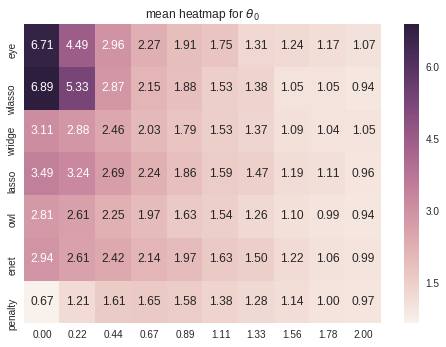

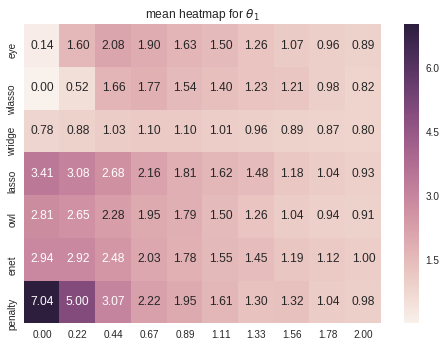

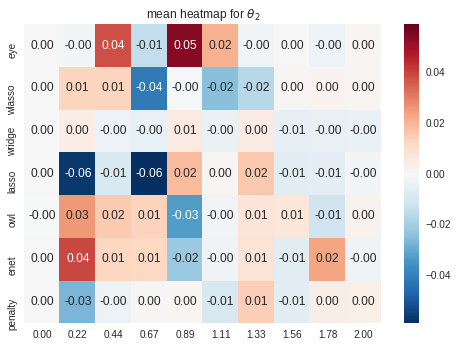

In [9]:
for i in range(3):
    heatmap = noise_mean_heatmap(feature=i)
    ax = sns.heatmap(heatmap, annot=True, fmt=".2f", cbar=True, yticklabels=regs, 
                     xticklabels=list(map(lambda x: "%.2f" % x, noise_levels)))
    sns.plt.title(r"mean heatmap for $\theta_%d$" % i)
    sns.plt.show()

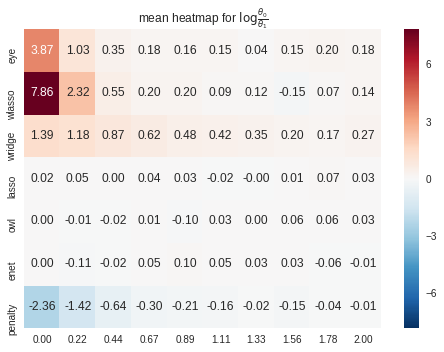

In [61]:
heatmap = np.log(noise_mean_heatmap(feature=0) / noise_mean_heatmap(feature=1))#noise_ratio_heatmap()
ax = sns.heatmap(heatmap, annot=True, fmt=".2f", cbar=True, yticklabels=regs, 
                 xticklabels=list(map(lambda x: "%.2f" % x, noise_levels)))
sns.plt.title(r"mean heatmap for $\log{\frac{\theta_0}{\theta_1}}$")
sns.plt.show()

# diff theta experiment

In [40]:
from comb_loss import abs_gini
sparsity = []
for m in ['wlasso', 'wridge', 'eye', 'enet', 'lasso', 'owl', 'penalty']:
    t = np.load("diff_theta/default/1/result_%s/theta.npy" % m)
    sparsity.append((m,abs_gini(t[0])))
for m, v in sorted(sparsity, key=lambda x: x[1], reverse=True):
    print(m, v)
    

wlasso 0.829467640092
eye 0.807163823857
lasso 0.7372064612
penalty 0.734874590822
enet 0.647335213162
wridge 0.42238932754
owl 0.389071768917


0.31537857294082644


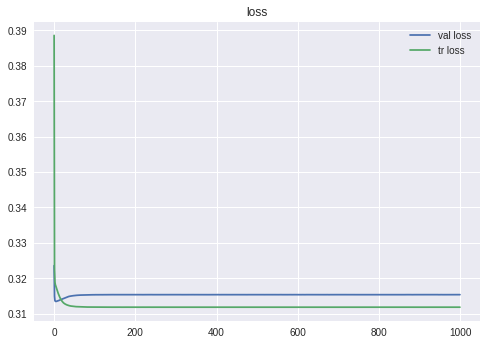

0.8610000000000002


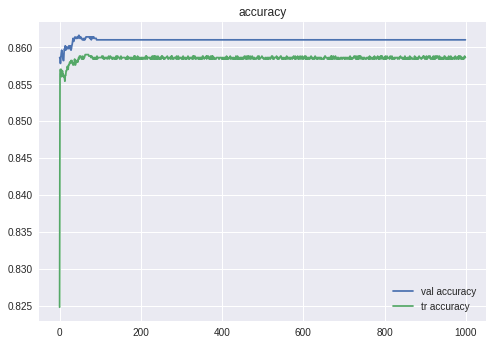

In [44]:
import plotResult
method = 'enet'
for c in ['loss', 'accuracy']:
    plotResult.plotResult("diff_theta/default/1/result_%s/log_0" % method, save=False, criteria=c)

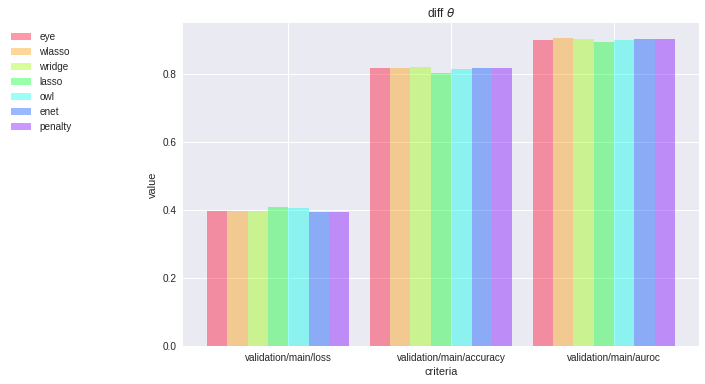

In [28]:
plotPerformance(basedir="diff_theta/default/3/", title=r"diff $\theta$")

In [54]:
# compute mse for all 30 runs
def mse(y, t):
    return ((y-t)**2).mean()

t = np.load("diff_theta/default/1/theta.npy")
y = np.load("diff_theta/default/1/result_eye/theta.npy")[:,:-1] # exlude b
mse(y, t)

mses = {}
num_runs=30
for i in range(1,num_runs+1):
    t = np.load("diff_theta/default/%d/theta.npy" % i)
    for m in ['wlasso', 'wridge', 'eye', 'enet', 'lasso', 'owl', 'penalty']:
        y = np.load("diff_theta/default/%d/result_%s/theta.npy" % (i, m))[:,:-1] # exclude b
        if not mses.get(m): mses[m] = 0
        mses[m] += mse(y,t)
for m, v in sorted(mses.items(), key=lambda x: x[1]):
    print("%s\t%f" %(m,v))

wridge	0.056974
penalty	0.062232
enet	0.092921
lasso	0.099351
wlasso	0.120746
owl	nan
eye	0.133122


# convergence of different lambda value

0.02343522012233734


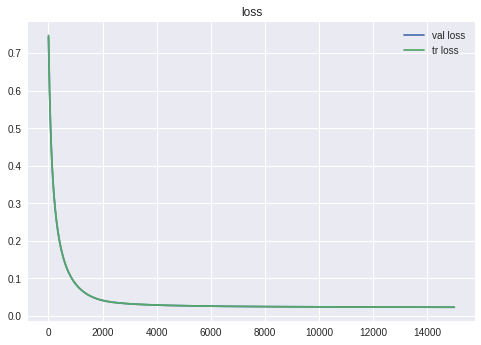

2.383418321609497


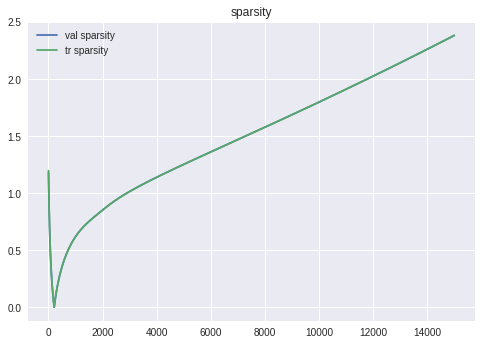

1.0


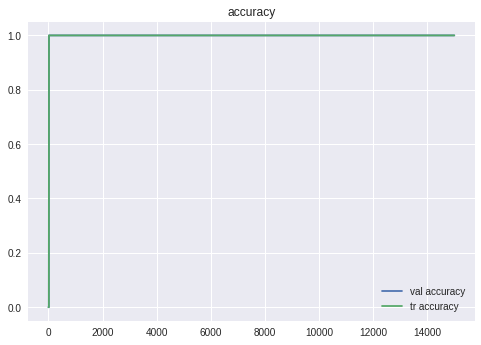

In [15]:
plotResult.plotResult("noise2d/alpha0.001/1/result_eye/log_0", save=False, criteria="loss")
plotResult.plotResult("noise2d/alpha0.001/1/result_eye/log_0", save=False, criteria="sparsity")
plotResult.plotResult("noise2d/alpha0.001/1/result_eye/log_0", save=False, criteria="accuracy")

0.02637963928282261


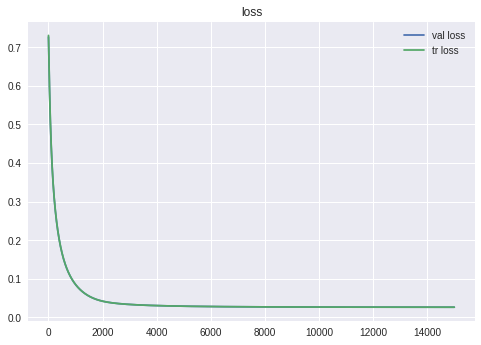

9.58305549621582


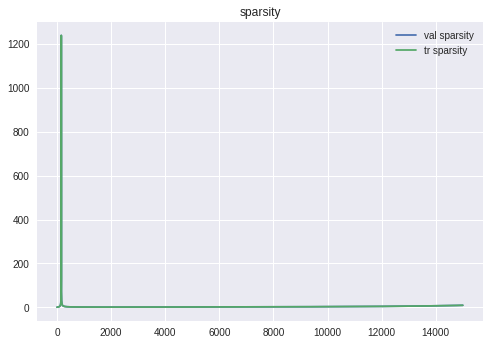

1.0


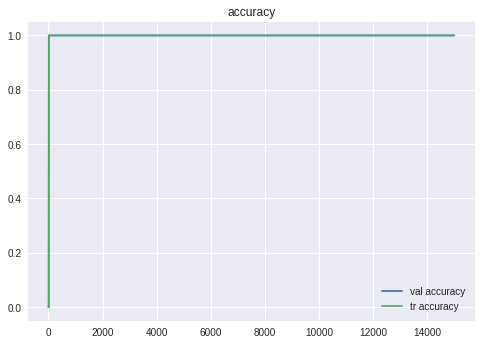

In [18]:
plotResult.plotResult("noise2d/alpha0.001/1/result_wlasso/log_0", save=False, criteria="loss")
plotResult.plotResult("noise2d/alpha0.001/1/result_wlasso/log_0", save=False, criteria="sparsity")
plotResult.plotResult("noise2d/alpha0.001/1/result_wlasso/log_0", save=False, criteria="accuracy")